In [1]:
import pandas as pd 

hospital= 'C:\\Users\\Jayanth\\OneDrive - The Pennsylvania State University\\Desktop\\Visual\\python\\processed_hospital_dataset.csv'

df = pd.read_csv(hospital)

In [4]:
pip install pymysql      

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sqlalchemy pymysql


   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 985.5 kB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.1 MB 985.5 kB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.1 MB 729.2 kB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.1 MB 729.2 kB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.1 MB 729.2 kB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.1 MB 729.2 kB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.1 MB 729.2 kB/s eta 0:00:02
   ------------------- -------------------- 1.0/2.1 MB 423.0 kB/s eta 0:00:03
   ------------------- -------------------- 1.0/2.1 MB 423.0 kB/s eta 0:00:03
   -------------------

In [ ]:
# Connect to your SQLite DB (same one used in DBeaver)
conn = sqlite3.connect("sqllite.db")

# Write to a new table
df.to_sql("hospital", conn, if_exists="replace", index=False)

conn.close()

In [26]:
import pandas as pd
import sqlite3


# Connect to your SQLite DB (same one used in DBeaver)
conn = sqlite3.connect("sqllite.db")

# Write to a new table
df.to_sql("hospital", conn, if_exists="replace", index=False)

conn.close()


In [ ]:
import os 


In [29]:
import sqlite3
import pandas as pd

# Step 1: Connect to your SQLite database
db_path = r"C:\Users\Jayanth\OneDrive - The Pennsylvania State University\Desktop\Visual\Python statistics\sqllite.db"
conn = sqlite3.connect(db_path)

# Step 2: Read the hospital table into a DataFrame
df = pd.read_sql_query("SELECT * FROM hospital", conn)
print("Original data:")
print(df.head())



Original data:
  patient_id   age  gender blood_pressure  cholesterol   bmi diabetes  \
0          2  46.0  Female         120/92        292.0  36.3       No   
1          3  89.0   Other         135/78        153.0  30.3       No   
2          4  84.0  Female         123/80        153.0  31.5       No   
3          5  32.0   Other         135/84        205.0  18.4       No   
4          6  75.0  Female        139/100        194.0  33.5       No   

  hypertension  medication_count  length_of_stay discharge_destination  \
0           No               4.0             3.0      Nursing_Facility   
1          Yes               1.0             1.0                  Home   
2          Yes               3.0            10.0                  Home   
3          Yes               6.0             4.0      Nursing_Facility   
4          Yes               0.0            10.0                  Home   

  readmitted_30_days  LOS_Double  LOS_GT_5  Senior_LongStay  BitwiseDemo  \
0                 No     

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             30000 non-null  object 
 1   age                    30000 non-null  float64
 2   gender                 30000 non-null  object 
 3   blood_pressure         30000 non-null  object 
 4   cholesterol            30000 non-null  float64
 5   bmi                    30000 non-null  float64
 6   diabetes               30000 non-null  object 
 7   hypertension           30000 non-null  object 
 8   medication_count       29999 non-null  float64
 9   length_of_stay         29999 non-null  float64
 10  discharge_destination  30000 non-null  object 
 11  readmitted_30_days     30000 non-null  object 
 12  LOS_Double             29999 non-null  float64
 13  LOS_GT_5               29999 non-null  float64
 14  Senior_LongStay        29999 non-null  float64
 15  Bi

In [12]:
# Fill missing values in numerical columns (continuous - interval/ratio)
df['age'] = df['age'].fillna(df['age'].median())             # age: numerical (interval)
df['cholesterol'] = df['cholesterol'].fillna(df['cholesterol'].median())  # cholesterol: numerical (ratio)
df['bmi'] = df['bmi'].fillna(df['bmi'].median())             # bmi: numerical (ratio)

# Fill missing values in categorical columns (nominal)
for col in ['gender', 'diabetes', 'hypertension', 'discharge_destination', 'readmitted_30_days']:
    df[col] = df[col].fillna(df[col].mode()[0])              # All: categorical (nominal)

In [13]:
# Drop rows missing patient_id (identifier - nominal)
df.dropna(subset=['patient_id'], inplace=True)

In [16]:
readmit_counts = df['readmitted_30_days'].value_counts()
print("Readmission class distribution:\n", readmit_counts)


Readmission class distribution:
 readmitted_30_days
No     26327
Yes     3673
Name: count, dtype: int64


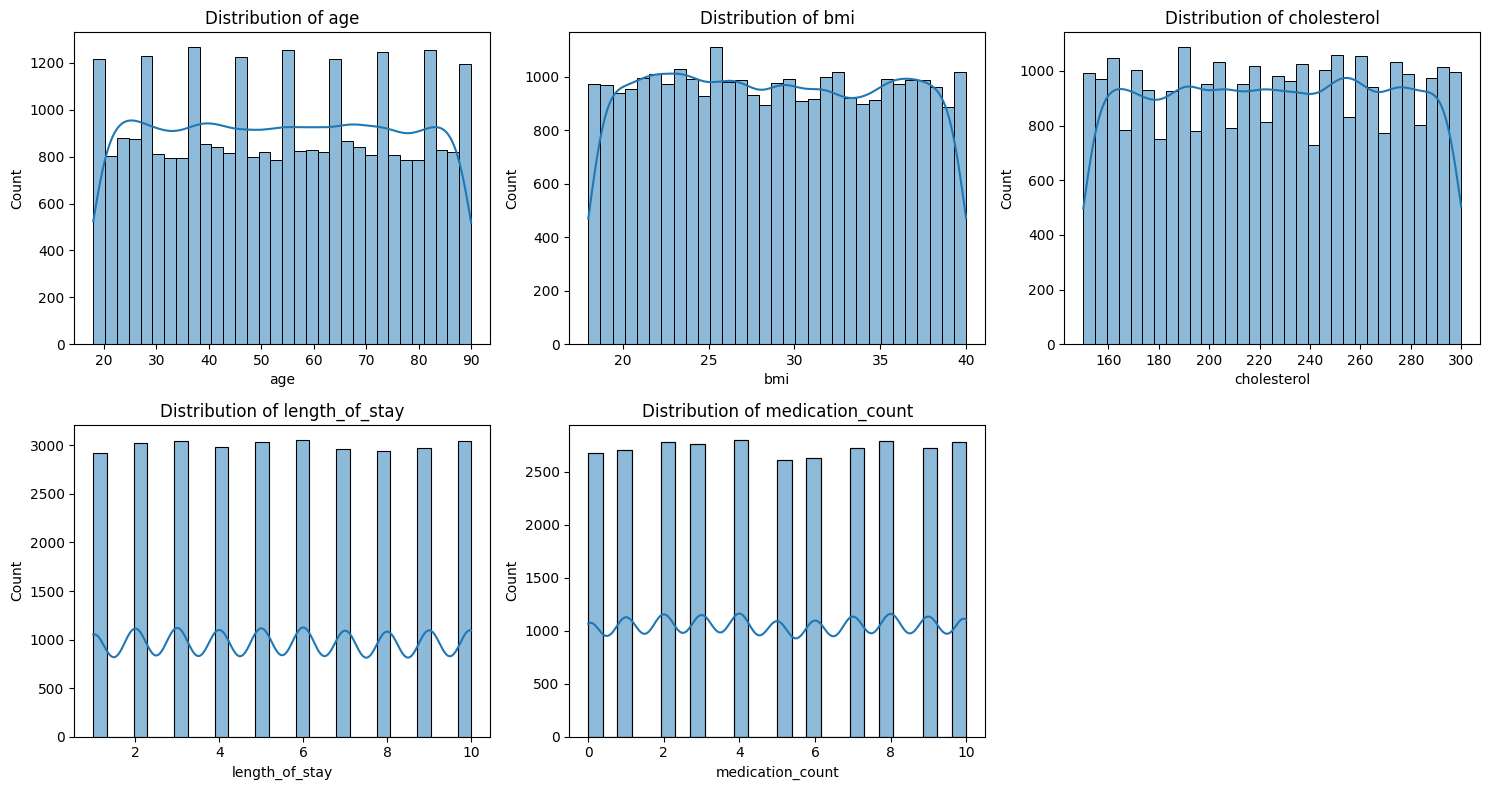

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = ['age', 'bmi', 'cholesterol', 'length_of_stay', 'medication_count']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

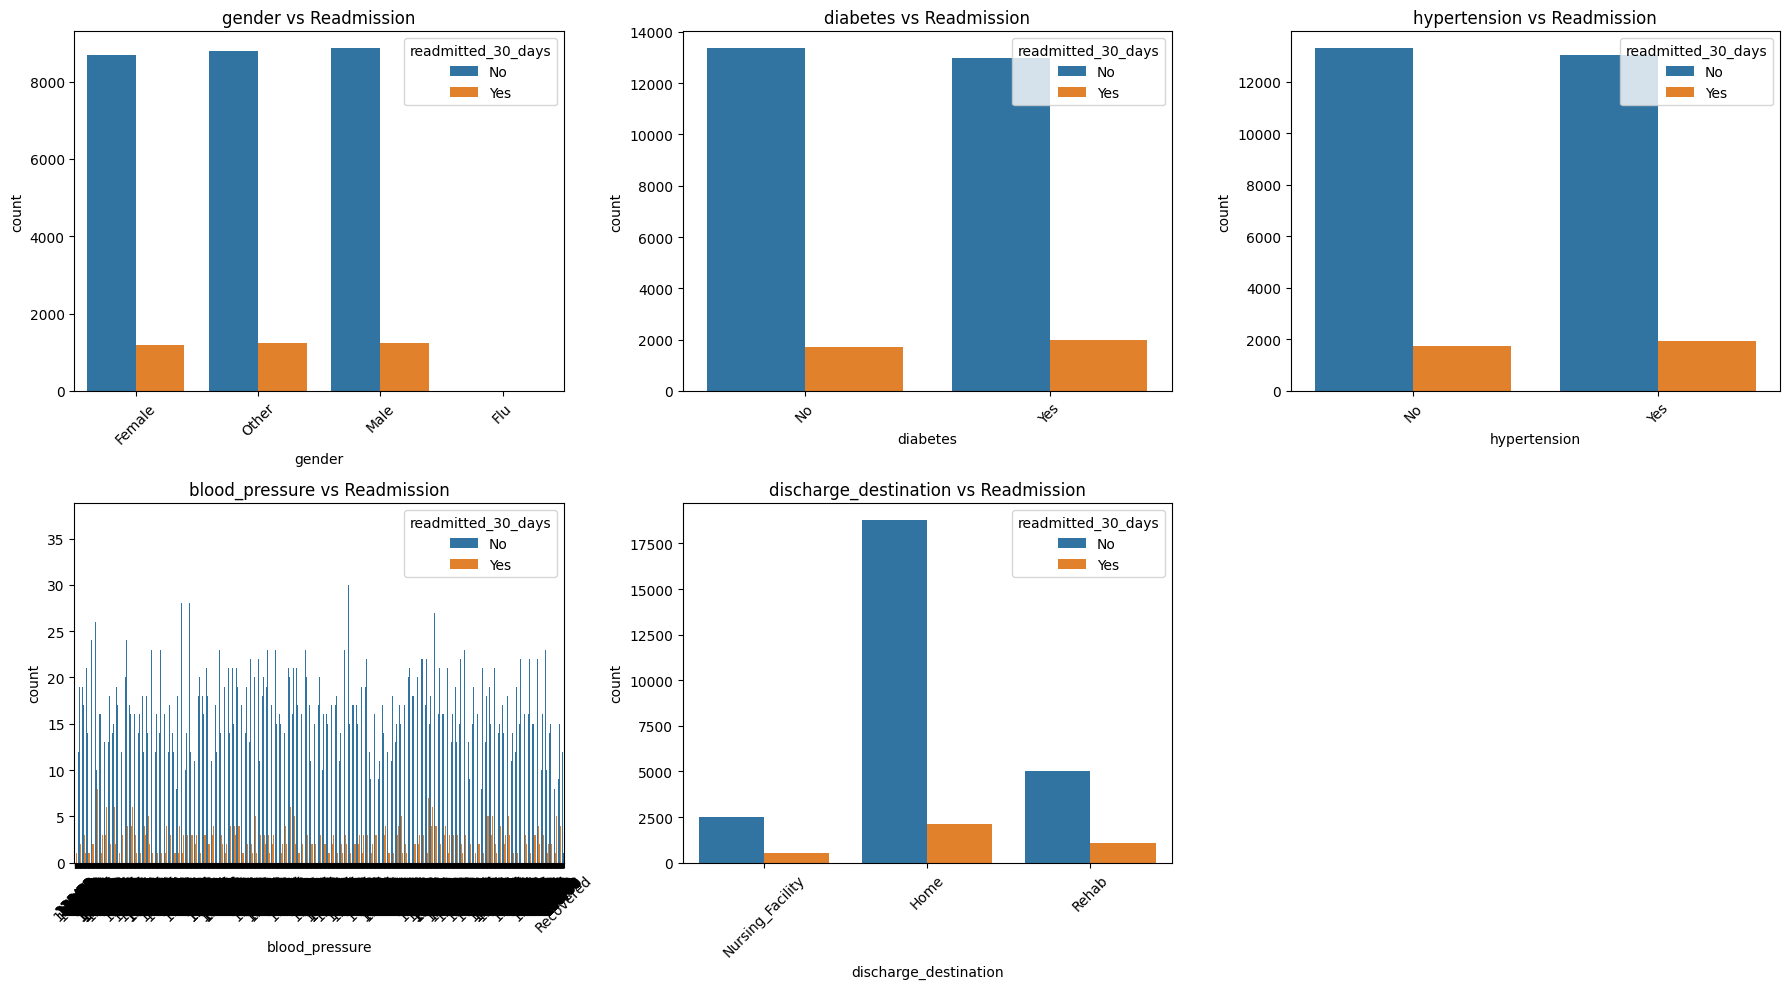

In [22]:
categorical_cols = ['gender', 'diabetes', 'hypertension', 'blood_pressure', 'discharge_destination']

plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='readmitted_30_days')
    plt.title(f"{col} vs Readmission")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

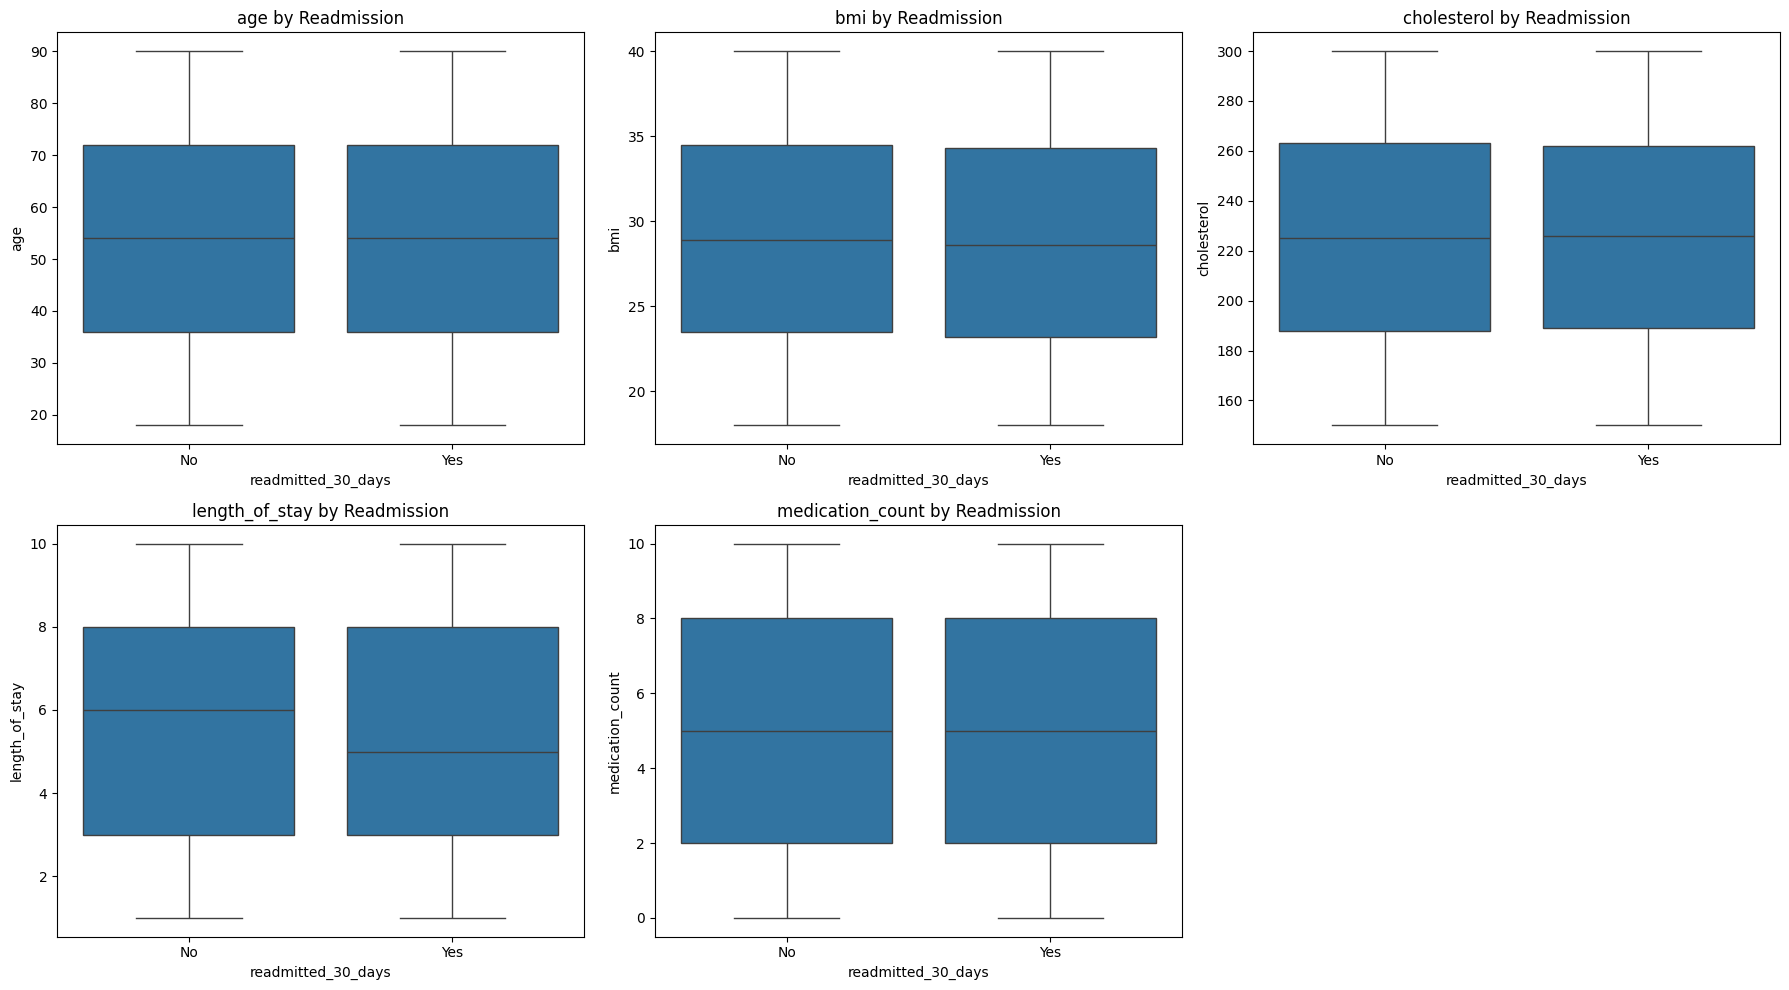

In [23]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='readmitted_30_days', y=col)
    plt.title(f"{col} by Readmission")
plt.tight_layout()
plt.show()